# Imports essenciais 

In [1]:
# Imports das bibliotecas utilizadas
import locale
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Não exibe as mensagens de warnings
warnings.filterwarnings('ignore')

# Define valores padrão para as figuras do matplotlib e aplicando configurações ao Jupyter Notebooks
%matplotlib inline
rcParams['figure.figsize'] = 15, 6

# Função para converter Float em Currency
locale.setlocale(locale.LC_MONETARY, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [2]:
# Uniformizando os gráficos plotados com o seaborn
sns.set_palette('Accent')
sns.set_style('darkgrid')

# Definindo tipos das colunas antes de ler o dataset
columns_types = {'dt_mesano': str, 'dt_ano': int}

# Lendo dataset base

In [3]:
df = pd.read_csv('dados/TCE-PB-SAGRES-Receita_Orcamentaria_Esfera_Municipal.txt', sep='|', dtype=columns_types)
df.head()

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,tp_atualizacaoreceita,de_atualizacaoreceita,vl_lancamentoOrc,dt_mesano
0,201001.0,Prefeitura Municipal de Água Branca,2004,11130500,Imposto Sobre Serviços de Quaquer Natureza - ISS,1,Lançamento de receita,1906.61,012004
1,201001.0,Prefeitura Municipal de Água Branca,2004,11130500,Imposto Sobre Serviços de Quaquer Natureza - ISS,1,Lançamento de receita,1333.25,022004
2,201001.0,Prefeitura Municipal de Água Branca,2004,11130500,Imposto Sobre Serviços de Quaquer Natureza - ISS,1,Lançamento de receita,2395.07,032004
3,201001.0,Prefeitura Municipal de Água Branca,2004,11130500,Imposto Sobre Serviços de Quaquer Natureza - ISS,1,Lançamento de receita,1733.52,042004
4,201001.0,Prefeitura Municipal de Água Branca,2004,11130500,Imposto Sobre Serviços de Quaquer Natureza - ISS,1,Lançamento de receita,1914.97,052004


In [4]:
print(f'O dataset principal possui {df.shape[0]} linhas.')

O dataset principal possui 1739187 linhas.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739187 entries, 0 to 1739186
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   cd_ugestora            float64
 1   de_ugestora            object 
 2   dt_ano                 int32  
 3   cd_receitaorcug        int64  
 4   de_receitaorcug        object 
 5   tp_atualizacaoreceita  int64  
 6   de_atualizacaoreceita  object 
 7   vl_lancamentoOrc       float64
 8   dt_mesano              object 
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 112.8+ MB


### Relatório:
##### O dataset possui um enorme volume de dados, possui mais de um milhão de linhas, beira aos dois milhões, com todas as informações sobre as receitas de todos os munícipios do Estado da Paraíba.
##### Ressalto que, em prévias visualizações e análises, já minerei e retirei os dados das unidades gestoras que são ligadas ao município de Cajazeiras.
##### A seguir, apresentarei alguns outros datasets com as unidades gestoras em apartado.

# Apresentando outros datasets com as unidades gestoras que constam no Sagres-PB

In [6]:
df_prefeitura_municipal = df.query('cd_ugestora == 201046.0')
df_prefeitura_municipal

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,tp_atualizacaoreceita,de_atualizacaoreceita,vl_lancamentoOrc,dt_mesano
326935,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,1,Lançamento de receita,48005.92,012003
326936,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,1,Lançamento de receita,53735.80,022003
326937,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,1,Lançamento de receita,35246.88,032003
326938,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,1,Lançamento de receita,38706.45,042003
326939,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,1,Lançamento de receita,100463.35,052003
...,...,...,...,...,...,...,...,...,...
336370,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,NaN,1,Lançamento de receita,2623876.81,082021
336371,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,NaN,1,Lançamento de receita,228163.20,082021
336372,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,NaN,1,Lançamento de receita,2271508.07,092021
336373,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,NaN,1,Lançamento de receita,197522.44,092021


In [7]:
df_prev_cz = df.query('cd_ugestora == 302046.0')
df_prev_cz

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,tp_atualizacaoreceita,de_atualizacaoreceita,vl_lancamentoOrc,dt_mesano
1661301,302046.0,Instituto de Prev. e Assistência do Município ...,2007,12102907,Contribui‡Æo de Servidor Ativo Civil - Legisla...,1,Lançamento de receita,75230.19,012007
1661302,302046.0,Instituto de Prev. e Assistência do Município ...,2007,12102907,Contribui‡Æo de Servidor Ativo Civil - Legisla...,1,Lançamento de receita,72757.38,022007
1661303,302046.0,Instituto de Prev. e Assistência do Município ...,2007,12102907,Contribui‡Æo de Servidor Ativo Civil - Legisla...,1,Lançamento de receita,2305.93,032007
1661304,302046.0,Instituto de Prev. e Assistência do Município ...,2007,12102907,Contribui‡Æo de Servidor Ativo Civil - Legisla...,1,Lançamento de receita,152453.69,042007
1661305,302046.0,Instituto de Prev. e Assistência do Município ...,2007,12102907,Contribui‡Æo de Servidor Ativo Civil - Legisla...,1,Lançamento de receita,60550.82,052007
...,...,...,...,...,...,...,...,...,...
1663098,302046.0,Instituto de Prev. e Assistência do Município ...,2020,72180411,CPSSS Patronal - Parcelamentos - Servidor Civi...,1,Lançamento de receita,691.44,112020
1663590,302046.0,Instituto de Prev. e Assistência do Município ...,2021,12180121,NaN,1,Lançamento de receita,1852.99,062021
1663591,302046.0,Instituto de Prev. e Assistência do Município ...,2021,12180121,NaN,1,Lançamento de receita,1254.54,072021
1663592,302046.0,Instituto de Prev. e Assistência do Município ...,2021,12180121,NaN,1,Lançamento de receita,1428.52,082021


In [8]:
df_sctrans_cz = df.query('cd_ugestora == 301046.0')
df_sctrans_cz

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,tp_atualizacaoreceita,de_atualizacaoreceita,vl_lancamentoOrc,dt_mesano
1632198,301046.0,Superitendência Cajazeirense de Transporte e T...,2008,11213100,Taxa de Utiliza‡Æo de …rea de Dom¡nio P£blico ...,1,Lançamento de receita,619.50,012008
1632199,301046.0,Superitendência Cajazeirense de Transporte e T...,2008,11213100,Taxa de Utiliza‡Æo de …rea de Dom¡nio P£blico ...,1,Lançamento de receita,5951.72,022008
1632200,301046.0,Superitendência Cajazeirense de Transporte e T...,2008,11213100,Taxa de Utiliza‡Æo de …rea de Dom¡nio P£blico ...,1,Lançamento de receita,2354.98,032008
1632201,301046.0,Superitendência Cajazeirense de Transporte e T...,2008,11213100,Taxa de Utiliza‡Æo de …rea de Dom¡nio P£blico ...,1,Lançamento de receita,4407.02,042008
1632258,301046.0,Superitendência Cajazeirense de Transporte e T...,2010,12209900,Outras Contribui‡äes Economicas,1,Lançamento de receita,414.00,012010
...,...,...,...,...,...,...,...,...,...
1633357,301046.0,Superitendência Cajazeirense de Transporte e T...,2020,19100111,Multas Previstas em Legislação Específica - Pr...,1,Lançamento de receita,73571.44,082020
1633358,301046.0,Superitendência Cajazeirense de Transporte e T...,2020,19100111,Multas Previstas em Legislação Específica - Pr...,1,Lançamento de receita,77033.53,092020
1633359,301046.0,Superitendência Cajazeirense de Transporte e T...,2020,19100111,Multas Previstas em Legislação Específica - Pr...,1,Lançamento de receita,64034.41,102020
1633360,301046.0,Superitendência Cajazeirense de Transporte e T...,2020,19100111,Multas Previstas em Legislação Específica - Pr...,1,Lançamento de receita,20210.64,112020


In [9]:
df_consorcio_saude = df.query('cd_ugestora == 701046.0')
df_consorcio_saude

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,tp_atualizacaoreceita,de_atualizacaoreceita,vl_lancamentoOrc,dt_mesano
1735080,701046.0,Consórcio Intermunicipal de Saúde dos Municípi...,2014,17213700,Transferências a Consórcios Públicos,1,Lançamento de receita,76504.15,012014
1735081,701046.0,Consórcio Intermunicipal de Saúde dos Municípi...,2014,17213700,Transferências a Consórcios Públicos,1,Lançamento de receita,109383.51,022014
1735082,701046.0,Consórcio Intermunicipal de Saúde dos Municípi...,2014,17213700,Transferências a Consórcios Públicos,1,Lançamento de receita,38900.77,032014
1735083,701046.0,Consórcio Intermunicipal de Saúde dos Municípi...,2014,17213700,Transferências a Consórcios Públicos,1,Lançamento de receita,67789.55,042014
1735084,701046.0,Consórcio Intermunicipal de Saúde dos Municípi...,2014,17213700,Transferências a Consórcios Públicos,1,Lançamento de receita,60090.65,052014
...,...,...,...,...,...,...,...,...,...
1735736,701046.0,Consórcio Intermunicipal de Saúde dos Municípi...,2021,17380211,NaN,1,Lançamento de receita,186316.94,082021
1735737,701046.0,Consórcio Intermunicipal de Saúde dos Municípi...,2021,17380211,NaN,1,Lançamento de receita,175248.61,092021
1736243,701046.0,Consórcio Intermunicipal de Saúde dos Municípi...,2016,17233700,Transferências a Consórcios Públicos,1,Lançamento de receita,114810.25,102016
1736244,701046.0,Consórcio Intermunicipal de Saúde dos Municípi...,2016,17233700,Transferências a Consórcios Públicos,1,Lançamento de receita,106440.28,112016


In [10]:
df_fundo_munic_saude = df.query('cd_ugestora == 601046.0')
df_fundo_munic_saude

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,tp_atualizacaoreceita,de_atualizacaoreceita,vl_lancamentoOrc,dt_mesano
1677640,601046.0,Fundo Municipal de Saúde de Cajazeiras,2009,17213300,PAB FIXO,1,Lançamento de receita,863987.61,012009
1677641,601046.0,Fundo Municipal de Saúde de Cajazeiras,2009,17213300,PAB FIXO,1,Lançamento de receita,528229.72,022009
1677642,601046.0,Fundo Municipal de Saúde de Cajazeiras,2009,17213300,PAB FIXO,1,Lançamento de receita,774441.96,032009
1677643,601046.0,Fundo Municipal de Saúde de Cajazeiras,2009,17213300,PAB FIXO,1,Lançamento de receita,1074997.98,042009
1677644,601046.0,Fundo Municipal de Saúde de Cajazeiras,2009,17213300,PAB FIXO,1,Lançamento de receita,815766.70,052009
...,...,...,...,...,...,...,...,...,...
1678767,601046.0,Fundo Municipal de Saúde de Cajazeiras,2012,17213300,PAB FIXO,1,Lançamento de receita,1385056.48,082012
1678768,601046.0,Fundo Municipal de Saúde de Cajazeiras,2012,17213300,PAB FIXO,1,Lançamento de receita,1340927.74,092012
1678769,601046.0,Fundo Municipal de Saúde de Cajazeiras,2012,17213300,PAB FIXO,1,Lançamento de receita,1425013.86,102012
1678770,601046.0,Fundo Municipal de Saúde de Cajazeiras,2012,17213300,PAB FIXO,1,Lançamento de receita,1243354.50,112012


In [11]:
df_fundo_munic_assist_social = df.query('cd_ugestora == 602046.0')
df_fundo_munic_assist_social

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,tp_atualizacaoreceita,de_atualizacaoreceita,vl_lancamentoOrc,dt_mesano
1717548,602046.0,Fundo Municipal de Assistência Social de Cajaz...,2012,13250000,RENDIMENTOS,1,Lançamento de receita,386.98,012012
1717549,602046.0,Fundo Municipal de Assistência Social de Cajaz...,2012,13250000,RENDIMENTOS,1,Lançamento de receita,798.01,022012
1717550,602046.0,Fundo Municipal de Assistência Social de Cajaz...,2012,13250000,RENDIMENTOS,1,Lançamento de receita,709.29,032012
1717575,602046.0,Fundo Municipal de Assistência Social de Cajaz...,2013,13250000,Remuneração de Depósitos Bancários,1,Lançamento de receita,144.23,012013
1717576,602046.0,Fundo Municipal de Assistência Social de Cajaz...,2013,13250000,Remuneração de Depósitos Bancários,1,Lançamento de receita,112.38,022013
1717577,602046.0,Fundo Municipal de Assistência Social de Cajaz...,2013,13250000,Remuneração de Depósitos Bancários,1,Lançamento de receita,454.44,032013
1717578,602046.0,Fundo Municipal de Assistência Social de Cajaz...,2013,13250000,Remuneração de Depósitos Bancários,1,Lançamento de receita,601.28,042013
1717579,602046.0,Fundo Municipal de Assistência Social de Cajaz...,2013,13250000,Remuneração de Depósitos Bancários,1,Lançamento de receita,736.44,052013
1717580,602046.0,Fundo Municipal de Assistência Social de Cajaz...,2013,13250000,Remuneração de Depósitos Bancários,1,Lançamento de receita,662.37,062013
1717581,602046.0,Fundo Municipal de Assistência Social de Cajaz...,2013,13250000,Remuneração de Depósitos Bancários,1,Lançamento de receita,898.28,072013


In [12]:
df_hospt_infantil = df.query('cd_ugestora == 303046.0')
df_hospt_infantil

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,tp_atualizacaoreceita,de_atualizacaoreceita,vl_lancamentoOrc,dt_mesano
1666654,303046.0,Instituto Materno Infantil Júlio Maria Bandeir...,2010,17213300,Transferencias de Recursos do Sistema Unico de...,1,Lançamento de receita,76831.41,012010
1666655,303046.0,Instituto Materno Infantil Júlio Maria Bandeir...,2010,17213300,Transferencias de Recursos do Sistema Unico de...,1,Lançamento de receita,109510.60,022010
1666656,303046.0,Instituto Materno Infantil Júlio Maria Bandeir...,2010,17213300,Transferencias de Recursos do Sistema Unico de...,1,Lançamento de receita,101268.96,032010
1666657,303046.0,Instituto Materno Infantil Júlio Maria Bandeir...,2010,17213300,Transferencias de Recursos do Sistema Unico de...,1,Lançamento de receita,110160.35,042010
1666796,303046.0,Instituto Materno Infantil Júlio Maria Bandeir...,2011,11222100,Taxa de Servi‡os Cadastrais,1,Lançamento de receita,360.00,032011
1666797,303046.0,Instituto Materno Infantil Júlio Maria Bandeir...,2011,11222100,Taxa de Servi‡os Cadastrais,1,Lançamento de receita,15.00,042011
1666806,303046.0,Instituto Materno Infantil Júlio Maria Bandeir...,2010,17213300,Transferencias de Recursos do Sistema Unico de...,1,Lançamento de receita,101723.75,052010
1666807,303046.0,Instituto Materno Infantil Júlio Maria Bandeir...,2010,17213300,Transferencias de Recursos do Sistema Unico de...,1,Lançamento de receita,101339.37,062010
1666808,303046.0,Instituto Materno Infantil Júlio Maria Bandeir...,2010,17213300,Transferencias de Recursos do Sistema Unico de...,1,Lançamento de receita,81628.58,072010
1666809,303046.0,Instituto Materno Infantil Júlio Maria Bandeir...,2010,17213300,Transferencias de Recursos do Sistema Unico de...,1,Lançamento de receita,101502.87,082010


In [13]:
df_secr_meio_ambiente = df.query('cd_ugestora == 304046.0')
df_secr_meio_ambiente

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,tp_atualizacaoreceita,de_atualizacaoreceita,vl_lancamentoOrc,dt_mesano
1668447,304046.0,Superintendência Municipal de Meio Ambiente de...,2011,10000000,Receitas Correntes,1,Lançamento de receita,0.01,012011


### Relatório:
##### Resta claro que iremos focar nossos esforços no que tange a unidade gestora 201046.0, que nada mais é que a Prefeitura Municipal. 
##### Esta, por sua vez, apresenta um maior número de linhas, e por consequência, de dados, que, além de estarem atualizados, poderão dar base suficiente para testes estatísticos e modelagem de previsões mais à frente.
#### Por enquanto, nos deteremos a uma análise exploratória e visual dos dados que este dataset nos disponibiliza. 

# Análise exploratória dos dados

## Validação do DataSet

In [14]:
df_prefeitura_municipal

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,tp_atualizacaoreceita,de_atualizacaoreceita,vl_lancamentoOrc,dt_mesano
326935,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,1,Lançamento de receita,48005.92,012003
326936,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,1,Lançamento de receita,53735.80,022003
326937,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,1,Lançamento de receita,35246.88,032003
326938,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,1,Lançamento de receita,38706.45,042003
326939,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,1,Lançamento de receita,100463.35,052003
...,...,...,...,...,...,...,...,...,...
336370,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,NaN,1,Lançamento de receita,2623876.81,082021
336371,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,NaN,1,Lançamento de receita,228163.20,082021
336372,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,NaN,1,Lançamento de receita,2271508.07,092021
336373,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,NaN,1,Lançamento de receita,197522.44,092021


In [15]:
df_prefeitura_municipal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8201 entries, 326935 to 336374
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cd_ugestora            8201 non-null   float64
 1   de_ugestora            8201 non-null   object 
 2   dt_ano                 8201 non-null   int32  
 3   cd_receitaorcug        8201 non-null   int64  
 4   de_receitaorcug        7627 non-null   object 
 5   tp_atualizacaoreceita  8201 non-null   int64  
 6   de_atualizacaoreceita  8201 non-null   object 
 7   vl_lancamentoOrc       8201 non-null   float64
 8   dt_mesano              8201 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 608.7+ KB


In [16]:
print(f'A coluna 4 possui 7627 linhas. O dataset possui 8201 linhas. Há {df_prefeitura_municipal.shape[0] - 7627} linhas nulas na coluna.')

A coluna 4 possui 7627 linhas. O dataset possui 8201 linhas. Há 574 linhas nulas na coluna.


De cara, notamos que a **coluna 4, de_receitaorcug**, possui alguns valores que são nulos, teremos que averiguar o motivo.

**Apagando as colunas 'tp_atualizacaoreceita' e 'de_atualizacaoreceita':**

In [17]:
del df_prefeitura_municipal['tp_atualizacaoreceita']
del df_prefeitura_municipal['de_atualizacaoreceita']

In [18]:
df_prefeitura_municipal

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,vl_lancamentoOrc,dt_mesano
326935,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,48005.92,012003
326936,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,53735.80,022003
326937,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,35246.88,032003
326938,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,38706.45,042003
326939,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,100463.35,052003
...,...,...,...,...,...,...,...
336370,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,NaN,2623876.81,082021
336371,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,NaN,228163.20,082021
336372,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,NaN,2271508.07,092021
336373,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,NaN,197522.44,092021


In [19]:
df_prefeitura_municipal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8201 entries, 326935 to 336374
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cd_ugestora       8201 non-null   float64
 1   de_ugestora       8201 non-null   object 
 2   dt_ano            8201 non-null   int32  
 3   cd_receitaorcug   8201 non-null   int64  
 4   de_receitaorcug   7627 non-null   object 
 5   vl_lancamentoOrc  8201 non-null   float64
 6   dt_mesano         8201 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 480.5+ KB


**DataSet atualizado e preparado para análises mais profundas.**

### Verificando quais os tipos de receitas que mais aparecem no dataset

**Definindo algumas funções que vamos utilizar mais à frente**

In [20]:
def em_reais(valor):
    '''
    Função para exibir os valores em reais.
    '''
    return locale.currency(valor, grouping=True)

def show_value_counts(serie, column_desc=None, grain='Registers', 
                      size=None, total=None, title=None, height=10, index=None, save = False):
    '''
    Função que plota os value_counts de uma série.
    '''
    fig = plt.figure(dpi=250)
    fig.set_size_inches(15, height)

    ax1 = plt.subplot(1,1,1)

    serie = serie.value_counts().sort_values(ascending=True)

    if not total:
        total = serie.sum()
    
    corte = ''
    
    if (index):
        serie = serie.rename(index)
    
    if serie.index.dtype != 'object':
        if serie.index.dtype == 'float64':
            serie.index = serie.index.map(int)
        serie.index = serie.index.map(str)
    serie.index = serie.index.map(str)
    
    if size and len(serie) > size:
        serie = serie.sort_values(ascending=False)
        serie = serie[:size]
        serie = serie.sort_values(ascending=True)
        corte = ' ({} mais frequentes)'.format(size)
    
    if not title:
        if column_desc:
            column = column_desc
        else:
            column = serie.name
        title = "#{} by {}{}".format(grain, column, corte)
   
    ax1.barh(serie.index, serie, align='center', color='c', ecolor='black')
    percentage = serie/total*100
    number_distance = serie.max()*0.005
    
    for i, v in enumerate(serie):
        pct = locale.format('%.2f', percentage[i], True)
        ax1.text(v+number_distance , i-0.2, '{0:,} ({1}%)'.format(v, pct), color='k')
    ax1.set(title=title,
           xlabel='',
           ylabel='')
    sns.despine(left=True, bottom=True)

    plt.show()
    plt.show()
    
    if save == True:
        fig.savefig('principais_receitas_cz_2003_2011.png', dpi=300)

In [21]:
# Descrição dos dados do DataSet
df_prefeitura_municipal.describe().round(2)

,cd_ugestora,dt_ano,cd_receitaorcug,vl_lancamentoOrc
count,8201.0,8201.00,8.201000e+03,8201.00
mean,201046.0,2013.54,2.390400e+08,181438.87
std,0.0,5.37,1.411344e+09,408341.91
min,201046.0,2003.00,1.112020e+07,0.01
25%,201046.0,2009.00,1.121990e+07,2339.03
50%,201046.0,2014.00,1.721010e+07,27925.85
75%,201046.0,2018.00,1.724020e+07,136858.68
max,201046.0,2021.00,9.517220e+09,4856803.68


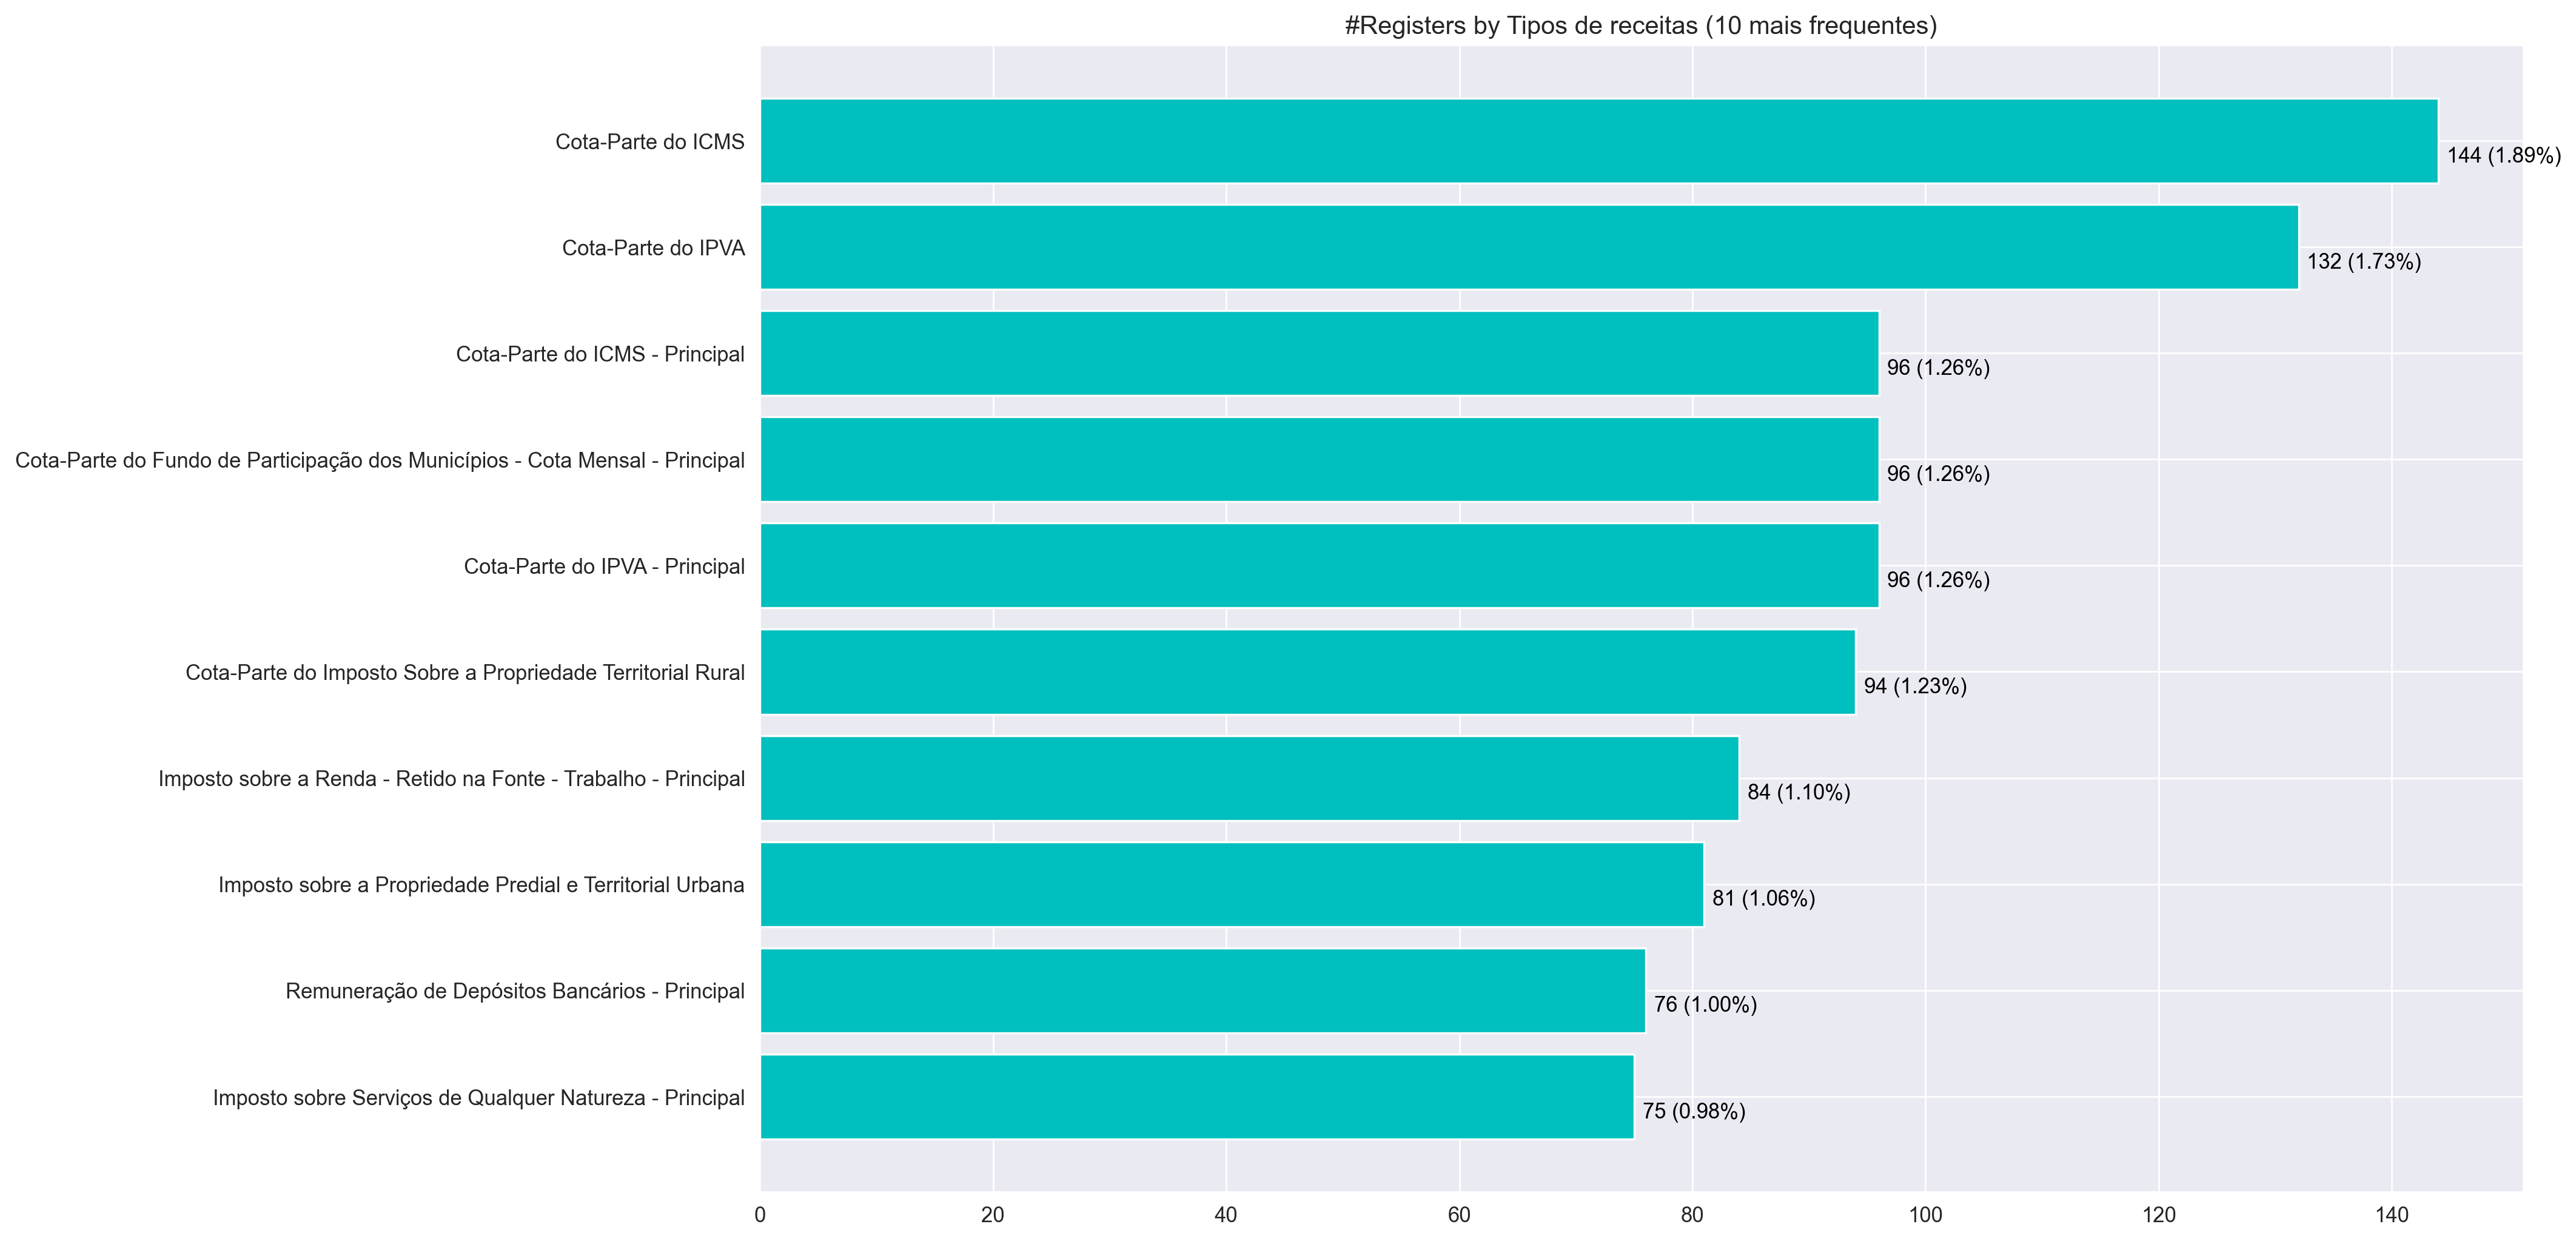

In [22]:
# Tipos de receitas que o Município recebe:
# Aqui, os valores não são referentes ao total em receita, mas quantas vezes aparece no dataset.
chart = show_value_counts(df_prefeitura_municipal['de_receitaorcug'],size=10,column_desc='Tipos de receitas',height=10,save=False)

### Verificando e tratando as colunas com dados nulos

In [23]:
df_prefeitura_municipal.isna().any()

cd_ugestora         False
de_ugestora         False
dt_ano              False
cd_receitaorcug     False
de_receitaorcug      True
vl_lancamentoOrc    False
dt_mesano           False
dtype: bool

Coluna **'de_receitaorcug'** possui dados nulos, como vimos mais acima.

In [24]:
# Preenchendo com valores as células nulas do dataset
df_prefeitura_municipal.fillna('Sem descrição', inplace=True)

Verificando se ainda existem valores nulos:

In [25]:
# Não há mais valores nulos!
df_prefeitura_municipal.isna().any()

cd_ugestora         False
de_ugestora         False
dt_ano              False
cd_receitaorcug     False
de_receitaorcug     False
vl_lancamentoOrc    False
dt_mesano           False
dtype: bool

In [26]:
df_prefeitura_municipal

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,vl_lancamentoOrc,dt_mesano
326935,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,48005.92,012003
326936,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,53735.80,022003
326937,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,35246.88,032003
326938,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,38706.45,042003
326939,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,100463.35,052003
...,...,...,...,...,...,...,...
336370,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,Sem descrição,2623876.81,082021
336371,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,Sem descrição,228163.20,082021
336372,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,Sem descrição,2271508.07,092021
336373,201046.0,Prefeitura Municipal de Cajazeiras,2021,17580111,Sem descrição,197522.44,092021


### Verificando se há valores na coluna dt_mesano que podem ser incoerentes

In [27]:
# Certificando se possuem meses incoerentes
df_prefeitura_municipal['dt_mesano'].str.slice(0,2).value_counts().sort_index()

01    649
02    626
03    658
04    711
05    713
06    724
07    717
08    713
09    701
10    674
11    641
12    674
Name: dt_mesano, dtype: int64

Verificamos que só há meses válidos

Alteraremos o tipo dos dados para datetime:

In [28]:
# Convertendo a coluna Mês/Ano em Datetime
df_prefeitura_municipal['dt_mesano'] = pd.to_datetime(df_prefeitura_municipal['dt_mesano'], format='%m%Y')

In [29]:
df_prefeitura_municipal.head()

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,vl_lancamentoOrc,dt_mesano
326935,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,48005.92,2003-01-01
326936,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,53735.80,2003-02-01
326937,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,35246.88,2003-03-01
326938,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,38706.45,2003-04-01
326939,201046.0,Prefeitura Municipal de Cajazeiras,2003,11130500,IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA,100463.35,2003-05-01


**Com os dados devidamente validados, começaremos agora a aprofundar nosso processo de análise de dados.**

## Análise inicial e obtenção de informações do dataset

Para iniciar o estudo do dataset, alguns questionamentos vieram a mente:

1. Quais os valores recebidos por ano?
2. Quais os valores recebidos por mês/ano?
3. Como se comporta a série temporal do total de receitas mês/ano do Município?
4. Como se fazer forecasting de valores orçamentários baseados no dataset?

Bem, vamos começar pela primeira pergunta:

### 1. Quais os valores recebidos por ano?

Para responder a essa pergunta, vamos primeiro remover as colunas que não agregam informação para isso em um novo Dataframe.

In [30]:
# Criar novo dataframe apenas com os dados que importam
receitas_por_ano = df_prefeitura_municipal.drop(columns=['cd_ugestora','de_ugestora','cd_receitaorcug','de_receitaorcug','dt_mesano'])
receitas_por_ano.head()

,dt_ano,vl_lancamentoOrc
326935,2003,48005.92
326936,2003,53735.80
326937,2003,35246.88
326938,2003,38706.45
326939,2003,100463.35


Aqui temos as várias entradas de receitas por mês dos anos de 2003 a 2018. No momento, queremos esses valores agrupados e somados por ano.

In [31]:
# Agrupar e calcular a soma da coluna vl_lancamentoOrc
receitas_por_ano['total'] = receitas_por_ano.groupby('dt_ano').transform('sum')
receitas_por_ano = receitas_por_ano.drop(columns=['vl_lancamentoOrc'])

In [32]:
# Removendo duplicatas e ordenando pelo ano
receitas_por_ano.drop_duplicates(keep='first', inplace=True)
receitas_por_ano.sort_values(by=['dt_ano'],ascending=True,inplace=True)

In [33]:
# Definindo o ano como índice
receitas_por_ano.set_index('dt_ano',inplace=True)
receitas_por_ano.head()

,total
dt_ano,
2003,22315085.44
2004,25001440.16
2005,31055827.43
2006,29468992.06
2007,37499224.29


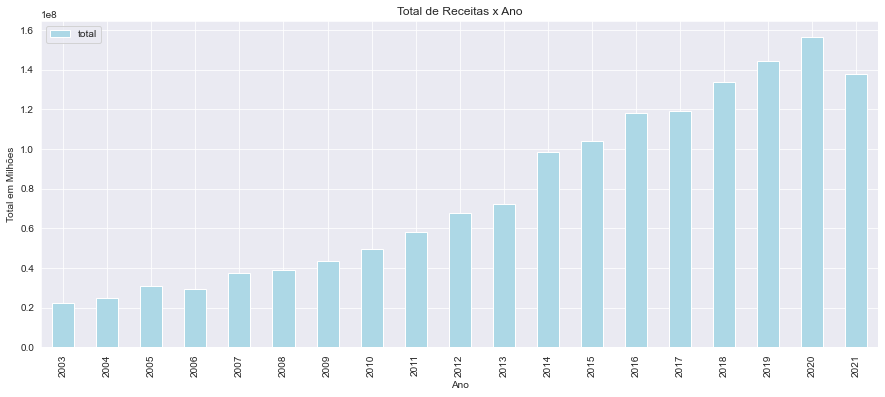

In [34]:
# Plotando gráfico: Total de recebimentos x Ano
ax = receitas_por_ano.plot(kind='bar',color='lightblue',title='Total de Receitas x Ano')

ax.set_ylabel('Total em Milhões')
ax.set_xlabel('Ano')

plt.show()

#### Relatório:
Pela análise gráfica, vemos que o ano de 2020 foi o ano fiscal que o município de Cajazeiras mais angariou repasses fiscais, tudo indica que à Pandemia do SARS-COV influenciou para tal aumento de cerca de 2 milhões em comparação com o ano anterior. 

Abaixo, vejamos alguns outros gráficos que comprovam atestam esse aumento:

In [35]:
# Informações sobre o desvio padrão, valores máximo e mínimo e os percentiles.
receitas_por_ano.describe()

,total
count,1.900000e+01
mean,7.831475e+07
std,4.584942e+07
min,2.231509e+07
25%,3.824898e+07
50%,6.776617e+07
75%,1.185042e+08
max,1.566390e+08


<AxesSubplot:>

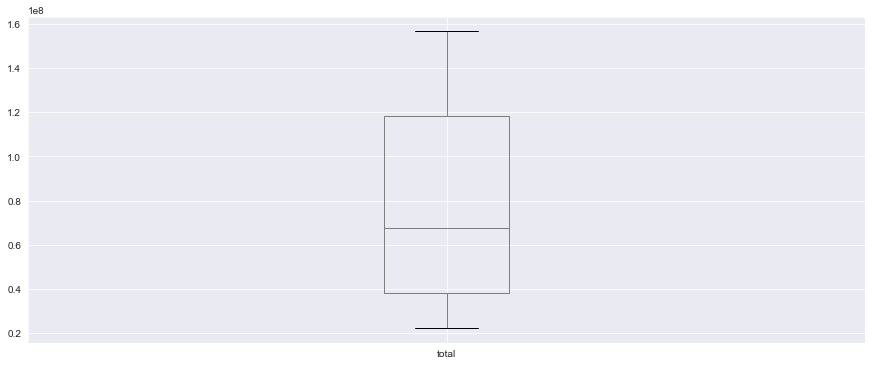

In [36]:
# Gráfico bolxplot dos totais de receitas recebidas entre os anos de 2003 e 2019
receitas_por_ano.boxplot()

In [37]:
# Ano que ocorreu o maior valor total de receitas
receitas_por_ano.idxmax(axis=0)

total    2020
dtype: int64

In [38]:
# Maior valor total de receitas recebidos em um mesmo ano
em_reais(receitas_por_ano.loc[2020]['total'])

'R$ 156.638.986,43'

#### Relatório:
Com o gráfico fica mais evidente a proporção dos valores recebidos por ano, e com isso pudemos identificar o ano que mais acumulou receita e o valor total acumulado.

**2020: R$ 156.638.986,43**

Mais da metade dos anos presentes no dataset mostram valores que são marcados como outliers, sejam eles superiores ou inforiores aos percentis. Isso pode acontecer devido a meses no ano em que as arrecadações sobem consideravelmente por eventos que ocorrem em intervalo de tempo, como prazos limites de pagamentos de impostos ou recebimentos de receitas que sofreram atrasos em alguns anos.

Mais abaixo iremos detalhar melhor os dados mensalmente. E rever esse mesmo gráfico agrupado por mês e verificar seu comportamento.

### 2. Quais valores recebidos por mês/ano

A análise aqui será similar a da pergunta anterior, mas levando em consideração da coluna **dt_mesano** ao invés da **dt_ano**.

In [39]:
# Criar novo dataframe apenas com os dados que importam
receitas_por_mes_ano = df_prefeitura_municipal.drop(columns=['cd_ugestora','de_ugestora','cd_receitaorcug','de_receitaorcug','dt_ano'])
receitas_por_mes_ano.head()

,vl_lancamentoOrc,dt_mesano
326935,48005.92,2003-01-01
326936,53735.80,2003-02-01
326937,35246.88,2003-03-01
326938,38706.45,2003-04-01
326939,100463.35,2003-05-01


In [40]:
# Agrupar e calcular a soma da coluna vl_lancamentoOrc
receitas_por_mes_ano['total'] = receitas_por_mes_ano.groupby('dt_mesano').transform('sum')
receitas_por_mes_ano = receitas_por_mes_ano.drop(columns=['vl_lancamentoOrc'])

In [41]:
# Removendo duplicatas
receitas_por_mes_ano.drop_duplicates(keep='first', inplace=True)
receitas_por_mes_ano.sort_values(by=['dt_mesano'],ascending=True,inplace=True)

In [42]:
# Definindo o mês/ano como índice
receitas_por_mes_ano.set_index('dt_mesano',inplace=True)
receitas_por_mes_ano.head()

,total
dt_mesano,
2003-01-01,2362955.64
2003-02-01,1817187.02
2003-03-01,1724916.42
2003-04-01,1780283.75
2003-05-01,2437069.86


Como os dados tratados aqui agora são os meses do ano, a visualização do gráfico utilizando barras não é aconselhável, pois serão plotados os meses e as informações sobre os meses no eixo X ficarão sobrepostos. Para melhorar a visualização, iremos utilizar um gráfico em linha. Isso também irá nos ambientar para nosso futuro estudo sobre a série temporal orçamentária.

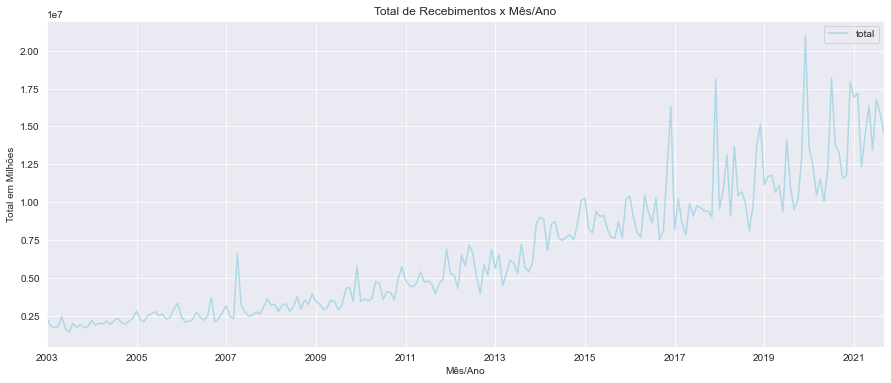

In [43]:
# Plotando gráfico: Total de recebimentos x Mês/Ano
ax = receitas_por_mes_ano.plot(kind='line',color='lightblue',title='Total de Recebimentos x Mês/Ano')

ax.set_ylabel('Total em Milhões')
ax.set_xlabel('Mês/Ano')

plt.show()

In [44]:
# Dados estatísticos
receitas_por_mes_ano.describe()

,total
count,2.250000e+02
mean,6.613245e+06
std,4.245897e+06
min,1.421699e+06
25%,2.923395e+06
50%,5.392466e+06
75%,9.405635e+06
max,2.100386e+07


<AxesSubplot:>

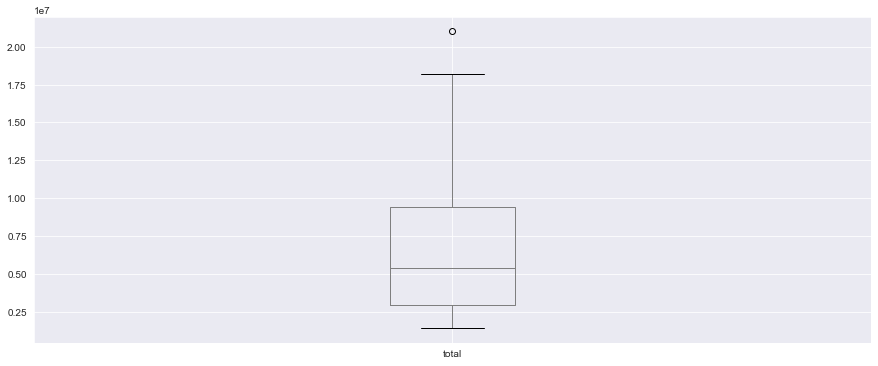

In [45]:
# Gráfico Bloxplot com os quartis, outliers, valores mínimos e máximos
receitas_por_mes_ano.boxplot()

#### Relatório:
Aqui o gráfico mostra que a mediana dos valores se encontra bem mais próxima do limite inferior do que o limite superior. Isso demonstra que quando enxergamos os dados da perspectica mensal os dados podem ter um comportamento diferente que o anual, que demonstrou ser mais distribuída ao longo do tempo.

In [46]:
# 5 meses com maior volume de receitas
receitas_por_mes_ano.total.nlargest(n=5)

dt_mesano
2019-12-01    21003863.15
2020-07-01    18203029.26
2017-12-01    18097475.53
2020-12-01    17908445.25
2021-02-01    17203850.04
Name: total, dtype: float64

In [47]:
# Valor formatado em reais de dezembro de 2019
em_reais(receitas_por_mes_ano.loc['2019-12-01']['total'])

'R$ 21.003.863,15'

O bloxplot acima nos dá informações sobre os percentis, desvio padrão, média, valor máximo e mínimo dos totais por mês/ano. Mas não mostra como fica essa distribuição agrupado por ano. Abaixo podemos ter essa visão e identificar o aparecimento de valores marcados como posíveis outliers.

<AxesSubplot:title={'center':'total'}, xlabel='[ano]'>

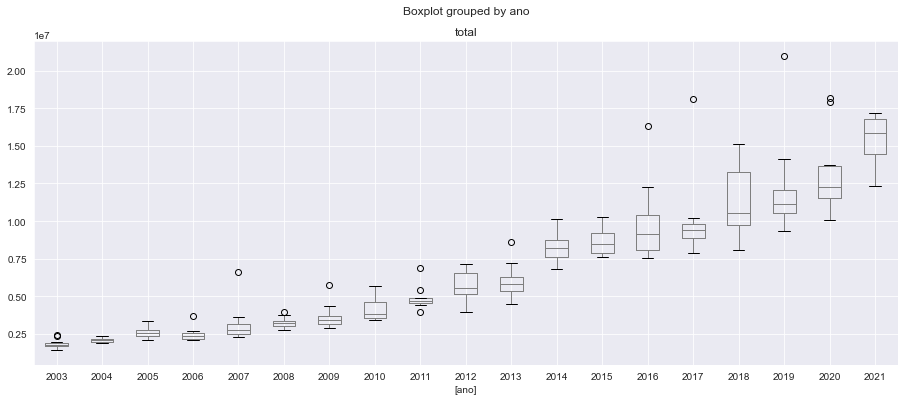

In [48]:
# Distribuição dos valores do dataset por ano
df = receitas_por_mes_ano.reset_index()
df['ano'] = df.dt_mesano.dt.year
df.boxplot(by='ano')

Agora vamos ver esse mesmo gráfico agrupado mensalmente. Os dados agora não mostram mais dados observados como **outliers**, isso mostra que a distribuição dos valores das receitas nos meses distribuídos pelos anos tiveram um comportamento normal para os padrões de cada mês.

<AxesSubplot:title={'center':'total'}, xlabel='[mês]'>

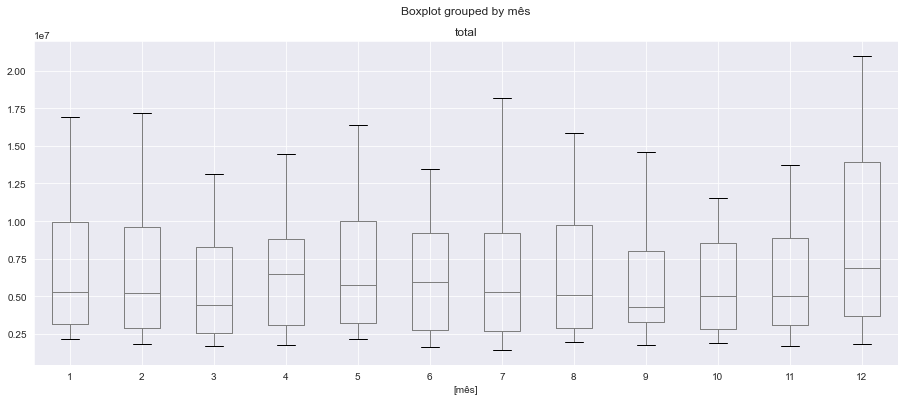

In [49]:
# Distribuição dos valores do dataset por ano
df = receitas_por_mes_ano.reset_index()
df['mês'] = df.dt_mesano.dt.month
df.boxplot(by='mês')

### Outliers

#### Relatório:

Como a análise da série é levando em consideração os dados mensais dos totais por mês, vou considerar a figura 5, onde apenas um dos valores foi apontado como outlier relativo aos demais dados. Para o tratamento do dado e com o intuito de não impactar os valores da série, vou utilizar a média do mês de dezembro do ano de 2018 (anterior) e o ano de 2020 (posterior).

In [50]:
receitas_por_mes_ano.total['2019-12-01'] = (receitas_por_mes_ano.total['2018-12-01'] + receitas_por_mes_ano.total['2020-12-01']) / 2

In [51]:
em_reais(receitas_por_mes_ano.total['2014-12-01'])

'R$ 10.111.418,16'

### 3. Como se comporta a série temporal do total de receitas mês/ano do Município?

Para se inicar o estudo da série temporal, vou primeiro dividir o dataset em dois tipos de bases. Uma base de treinamento do modelo preditivo (com aproximadamente 80% dos dados) e uma outra base de teste para validação do modelo (com os 20% restantes)

In [52]:
# Dividindo as bases
qtd_meses_teste = 41
ts_treino = receitas_por_mes_ano.iloc[:-qtd_meses_teste,0:1].copy()
ts_teste = receitas_por_mes_ano.iloc[-qtd_meses_teste:,0:1].copy()

In [53]:
# Início da base de teste
ts_teste.head()

,total
dt_mesano,
2018-05-01,13666225.87
2018-06-01,10414455.11
2018-07-01,10679414.56
2018-08-01,9874379.11
2018-09-01,8105225.09


In [54]:
# Final da base de treino
ts_treino.tail()

,total
dt_mesano,
2017-12-01,18097475.53
2018-01-01,9564480.07
2018-02-01,10744886.47
2018-03-01,13101969.08
2018-04-01,9083756.43


In [55]:
ts_treino

,total
dt_mesano,
2003-01-01,2362955.64
2003-02-01,1817187.02
2003-03-01,1724916.42
2003-04-01,1780283.75
2003-05-01,2437069.86
...,...
2017-12-01,18097475.53
2018-01-01,9564480.07
2018-02-01,10744886.47


Vamos agora iniciar o estudo da série temporal utilizando a base de treinamento.

Vamos falar sobre o gráfico criado apartir das receitas recebidas por mês pela Prefeitura Municipal de Cajazeiras durante os anos de 2003 a 2018. O ciclo escolhido será de 12 meses, levando em consideração o ano fiscal que a prefeitura deve seguir para o recebimento das receitas. A motivação é identificar no gráfico características de **Tendência, Sazonalidade e Resíduo.** Vejamos o gráfico abaixo:

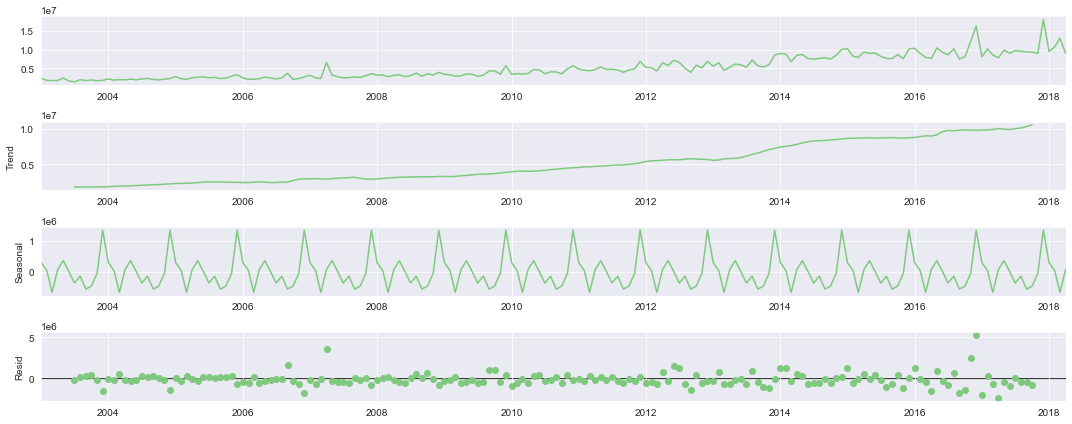

In [56]:
# Decomposição dos dados da base de treinamento
decomposicao = seasonal_decompose(ts_treino, period=12)
imagem = decomposicao.plot()

### Tendência/Trend

No gráfico Trend acima é possível identificar uma crescente na tendência dos dados no gráfico. Isso também fica evidente no gráfico original da série pois os valores tendem a crecer com o decorrer do tempo. O teste de Dickey-Fuller pode ser aplicado para mostrar se a série é probabilísticamente estacionária caso o valor p-value seja menor que 5%.

In [57]:
def teste_adf(serie):
    '''
    Função para exibir o teste Augmented Dickey-Fuller.
    '''
    result = adfuller(serie)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [58]:
# Teste Dickey-Fuller
teste_adf(ts_treino.total)

ADF Statistic: 1.878191
p-value: 0.998492
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576


O p-value é muito alto aqui, sendo 98%. Vamos precisar aplicar técnicas para estacionar a série.

#### Aplicando diferenciação

A diferenciação é usada para remover os sinais de tendência na tentativa de tornar a série estacionária.

In [59]:
# Aplicando a diferenciação na série e removendo dados nulos
ts_treino_diff_1 = ts_treino.diff()
ts_treino_diff_1 = ts_treino_diff_1.dropna()

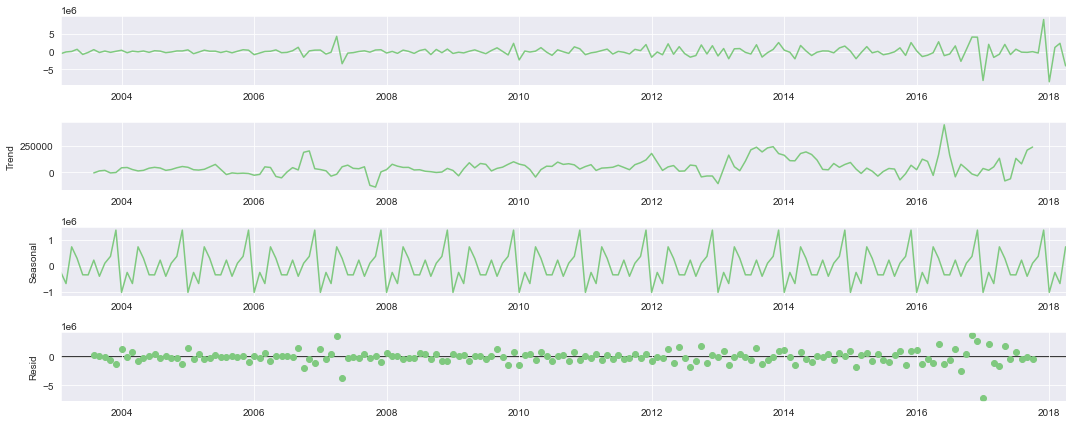

In [60]:
# Decomposição dos dados da base de treinamento
decomposicao = seasonal_decompose(ts_treino_diff_1, period=12)
imagem = decomposicao.plot()

Podemos notar agora que a tendência (gráfico Trend) varia em torno de 0. Vamos executar novamente o teste e validar o p-value.

In [61]:
# Teste Dickey-Fuller
teste_adf(ts_treino_diff_1.total)

ADF Statistic: -10.006143
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576


Com valor p-value 0 podemos considerar agora que a série é estacionária aplicando apenas 1 deferencial.

#### Autocorrelação(AR)

A autocorrelação nos informará qual o grau de relação que cada dado tem com os demais dados passados da série. Isso irá ajudar a definir o valor p para ser utilizado no modelo preditivo.

Para isso, iremos utilizar o gráfico ACF (Autocorrelation Factor), que irá nos mostrar o número de lags estão fora do intervalo de confiança. Esse valor será o nosso AR.

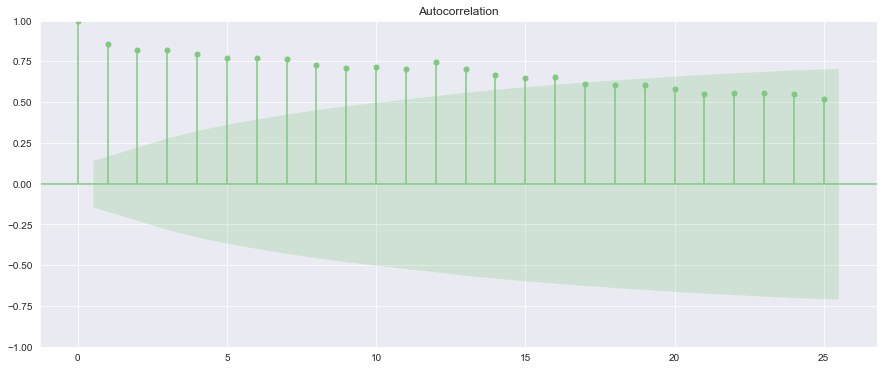

In [62]:
# Gráfico de autocorrelação
sm.graphics.tsa.plot_acf(ts_treino.values.squeeze(), lags=25)
plt.show()

Como o gráfico mostra, os valores ficam contidos no intervalo a partir do lag 15, então os valores a serem utilizados estará perto do valor 14. Após alguns testes e verificando o AIC e BIC do modelo, decidi usar o valor 11.

#### Médias Móveis(MA)

Para obter o valor das médias móveis e termos uma pista sobre o valor q, utilizaremos o gráfico PACF (Partial Autocorrelation Factor).

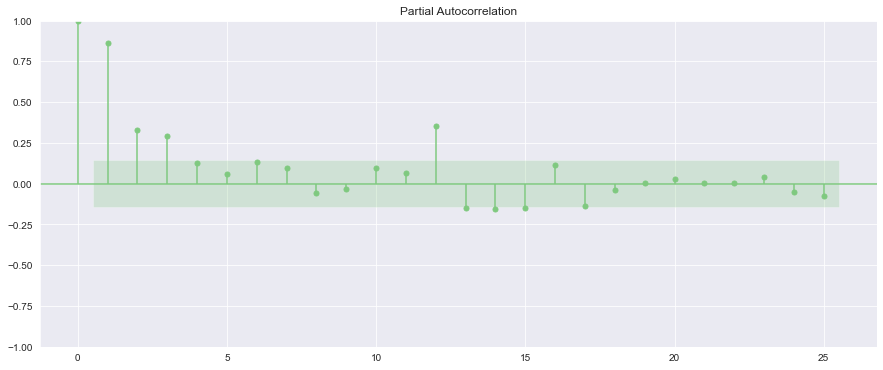

In [63]:
# Gráfico da autocorrelação parcial
sm.graphics.tsa.plot_pacf(ts_treino.values.squeeze(), lags=25)
plt.show()

Vemos aqui eu os três primeiros valores têm uma significância correlativa alta em relação aos demais. Então usarei o valor 3 inicialmente para definir o valor q do modelo preditivo.

#### Criando o modelo preditivo e realizando a predição

Definido os valores AR(p), I(d), MA(q) para nosso modelo ARIMA, vamos criar o modelo e mostrar no gráfico como ficou a predição em relação aos dados de teste definidos anteriormente.

In [64]:
# Criando o modelo
modelo = ARIMA(ts_treino, order=(11,1,3), freq=ts_treino.index.inferred_freq)

In [65]:
# Ajustando o modelo de acordo com os parâmetros
modelo_ajustado = modelo.fit()

In [66]:
# Exibe dados do modelo, como valores AIC e BIC obtidos.
modelo_ajustado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  total   No. Observations:                  184
Model:                ARIMA(11, 1, 3)   Log Likelihood               -2799.662
Date:                Wed, 01 Dec 2021   AIC                           5629.324
Time:                        10:22:32   BIC                           5677.466
Sample:                    01-01-2003   HQIC                          5648.838
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8574      0.170     -5.037      0.000      -1.191      -0.524
ar.L2         -0.8626      0.214     -4.022      0.000      -1.283      -0.442
ar.L3         -0.9248      0.255     -3.625      0.000      -1.425      -0.425
ar.L4         -0.7867      0.239     -3.292      0.001      -1.255      -0.318
ar.L5         -0.7195      0.208     -3.463      0.001      -1.127      -0.312
ar.L6         -0.5800      0.194     -2.986      0.003      -0.961      -0.199
ar.L7         -0.3851      0.193     -1.991      0.047      -0.764      -0.006
ar.L8         -0.4356      0.170     -2.561      0.010      -0.769      -0.102
ar.L9         -0.5120      0.177     -2.889      0.004      -0.859      -0.165
ar.L10        -0.3865      0.139     -2.788      0.005      -0.658      -0.115
ar.L11        -0.5028      0.074     -6.809      0.000      -0.648      -0.358
ma.L1          0.0802      0.187      0.428      0.668      -0.287       0.447
ma.L2          0.0887      0.158      0.559      0.576      -0.222       0.399
ma.L3          0.3891      0.182      2.144      0.032       0.033       0.745
sigma2       1.24e+12    1.9e-13   6.53e+24      0.000    1.24e+12    1.24e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):               395.87
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               5.11   Skew:                             1.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.18e+41. Standard errors may be unstable.
"""

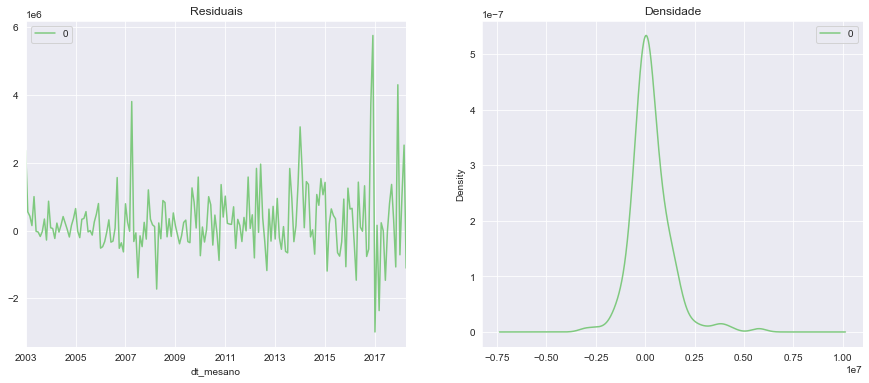

In [67]:
# Gráfico com os erros residuais do modelo ajustado
redisuais = pd.DataFrame(modelo_ajustado.resid)
fig, ax = plt.subplots(1,2)
redisuais.plot(title="Residuais", ax=ax[0])
redisuais.plot(kind='kde', title='Densidade', ax=ax[1])
plt.show()

Os resíduos ficam em torno de 0 com uma variação satisfatória, com os pontos tendendo a permanecer com média em torno de 0. E a densidade dos dados se comporta como uma distribuição normal

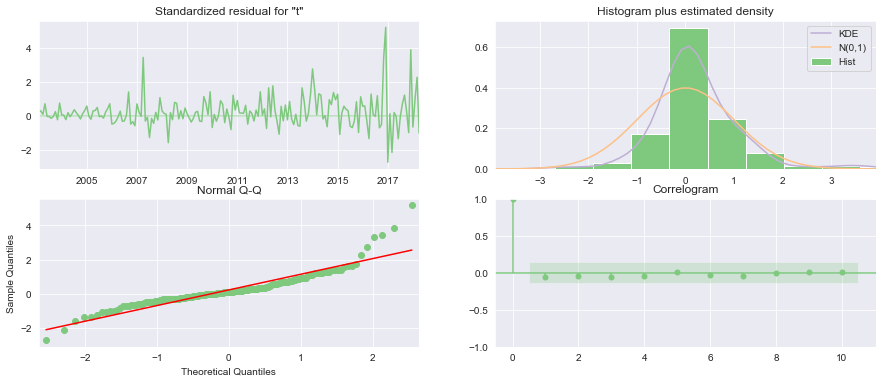

In [68]:
# Dados atuais x Modelo
modelo_ajustado.plot_diagnostics()
plt.show()

In [69]:
redisuais.describe()

,0
count,1.840000e+02
mean,2.788186e+05
std,1.028606e+06
min,-2.994915e+06
25%,-2.592419e+05
50%,1.479745e+05
75%,6.677883e+05
max,5.762294e+06


### 4. Como se fazer forecasting de valores orçamentários baseados no dataset?

Com os parâmetros definidos através da análise da série e criado o modelo ARIMA, para se criar a predição dos dados e comparando-os com os dados da base de treinamento, podemos ter uma idéia dos valores preditos em relação aos dados reais.

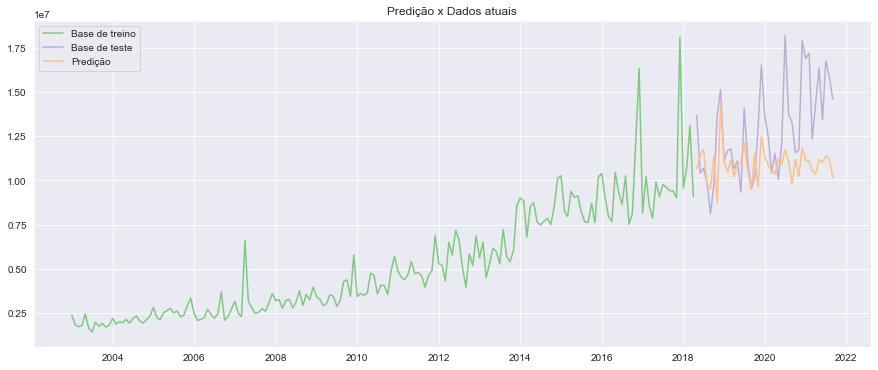

In [70]:
# Predição
fc = modelo_ajustado.forecast(41, alpha=0.05)

# Criando uma série partindo da predição
serie_predicao = pd.Series(fc, index=ts_teste.index)
serie_ic_inferior = pd.Series(index=ts_teste.index)
serie_ic_superior = pd.Series(index=ts_teste.index)

# Definindo o gráfico
plt.plot(ts_treino, label='Base de treino')
plt.plot(ts_teste, label='Base de teste')
plt.plot(serie_predicao, label='Predição')
plt.fill_between(serie_ic_inferior.index, serie_ic_inferior, serie_ic_superior, 
                 color='k', alpha=.15)
plt.title('Predição x Dados atuais')
plt.legend(loc='upper left')
plt.show()

#### Relatório:

Os dados obtidos neste gráfico mostra que a predição utilizando o modelo ARIMA(11,1,3) exibe pontos bem próximos dos reais, com exceção dos picos que estão presentes fora do intervalo de confiança do modelo, o comportamento da curva acompanha os dados reais da base de treinamento.